In [77]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import csv
#importing all the libraries
file_obj=open('zomato.csv',encoding='utf-8')
df=pd.read_csv(file_obj)

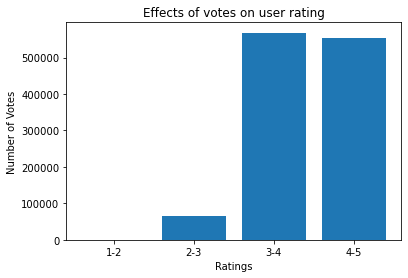

In [107]:
#Q2 part1 q1
#for Indian vlue as specified in question
df=df[df['Country Code']==1]
df1=df[['Aggregate rating','Votes']]
#slicing and getting required columns
df1=df1.astype('float64')
#dividing the ratings so as to plot in graph
sum4=df[df['Aggregate rating']>=4]['Votes'].sum()
sum3=df[df['Aggregate rating']>=3 ]['Votes'].sum()-sum4
sum2=df[df['Aggregate rating']>=2 ]['Votes'].sum()-sum4-sum3
sum1=df[df['Aggregate rating']>=1 ]['Votes'].sum()-sum4-sum3-sum2
#grouping above values according to rate category and find thew sum 
y=[sum1,sum2,sum3,sum4]
x=['1-2','2-3','3-4','4-5']
plt.bar(x,y)
plt.xlabel("Ratings")
plt.ylabel("Number of Votes")
plt.title("Effects of votes on user rating")
plt.show()
#plotting graph

In [79]:
#Q2 part1 q2

df2=df[['Cuisines','Aggregate rating']]
#Slicing for getting the desired values
df2

dfk = df['Cuisines'].str.count(',')
#Using commas to find no of values in cuisines
dfk

624     1
625     1
626     0
627     0
628     2
       ..
9271    4
9272    2
9273    2
9274    3
9275    0
Name: Cuisines, Length: 8652, dtype: int64

In [80]:
dfk+=1
df2["Cuisine count"]=dfk
#increasing by 1 to get right number of values in cuisine column
df2

<ipython-input-80-cc8db424bb71>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Cuisine count"]=dfk


,Cuisines,Aggregate rating,Cuisine count
624,"North Indian, Mughlai",3.9,2
625,"North Indian, Mughlai",3.5,2
626,North Indian,3.6,1
627,Rajasthani,4.0,1
628,"North Indian, Chinese, Mughlai",4.2,3
...,...,...,...
9271,"Continental, Seafood, Chinese, North Indian, B...",3.6,5
9272,"Cafe, North Indian, Chinese",3.7,3
9273,"Burger, Pizza, Biryani",4.3,3
9274,"American, North Indian, Thai, Continental",3.8,4


In [81]:
avg4=df2[df2['Cuisine count']>=4]['Aggregate rating'].mean()
avg3=df2[df2['Cuisine count']==3]['Aggregate rating'].mean()
avg2=df2[df2['Cuisine count']==2]['Aggregate rating'].mean()
avg1=df2[df2['Cuisine count']==1]['Aggregate rating'].mean()
#dividing into categories and groupuing by the ratings and finding mean
size=[avg1,avg2,avg3,avg4]
labels=['1cuisine','2cuisines','3cuisines','4cuisines']

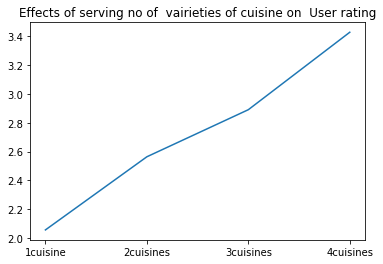

In [82]:
plt.title('Effects of serving no of  vairieties of cuisine on  User rating')
plt.plot( labels,size)

plt.show()


In [83]:
#Q2 part1 q3
df3=df[['Average Cost for two','Aggregate rating']]
df4=df3.groupby(['Average Cost for two'])['Aggregate rating'].mean()
#slicing to get requires columns
df4=df4[1:]
#removing cost 0 which is not required

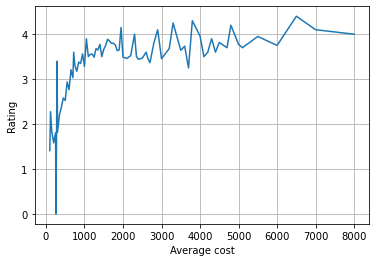

In [84]:
y=df4.values
x=df4.index
s=[]
s1=[]
for i in x:
    s.append(i)
#appending index in list    
for i in y:
    s1.append(i)
#appending values in list    
y=s1
x=s
plt.plot(x[1:79],y[1:79])
plt.xlabel('Average cost')
plt.ylabel('Rating')
plt.grid()
plt.show()

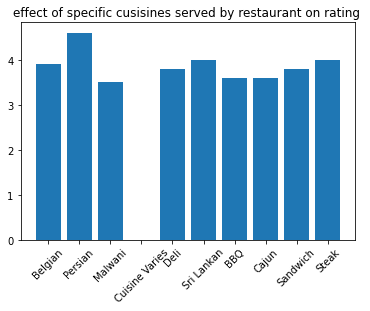

In [105]:
#Q2 part1 q4 
df5=df[df['Country Code']==1]
df5
uni=df5["Cuisines"]


uni
uni=list(uni)

d={}
y=[]
arr=[]

for i in uni:

    y.append(i.split(","))
for i in y:
    for k in i:
        j=k.strip()
        arr.append(j)    

for i in arr:
  
        if i in d:
            d[i]+=1
        else :
            d[i]=1

sort_orders = sorted(d.items(), key=lambda x: x[1])
sort_orders=sort_orders[0:10]#taking out top 10 least served dishes
lst=[3.9,4.6,3.5,0,3.8,4,3.6,3.6,3.8,4]
#finding mean rating in accordance to them
xd = ['Belgian','Persian','Malwani','Cuisine Varies','Deli','Sri Lankan','BBQ','Cajun','Sandwich','Steak'] 
#appending the names
plt.title('effect of specific cusisines served by restaurant on rating ')
plt.xticks(rotation=45)
plt.bar(xd,lst)
plt.show()



In [ ]:
#Q2 part2
df6=df[df['Country Code']==1]
df6
#slicing for getting Indian Values
df6['multiply']=df6['Aggregate rating']*df6['Votes']
#finding number of Votes*ratings


In [108]:
df7=df6.groupby('Locality')['Votes'].sum()
#Grouping by locaality to find total votes
df8=df6.groupby('Locality')['multiply'].sum()
#Grouping by locality to find the no of ratings into votes

df9=df8/df7
#dividing to find the weights
df9.dropna(inplace=True)

#dropping to find nan
x=list(df9.index)
#storing thelabes
y=list(df9.values)
#storing the values
res = sorted(range(len(y)), key = lambda sub: y[sub])[-10:] 
#sorting the values
res
for i in range(0,len(x)):
    for j in res:
        if j==i:
            print(x[i],y[i])
#printing the top 10 values             

Aminabad 4.9
Banjara Hills 4.7187617260787995
Deccan Gymkhana 4.8
Express Avenue Mall,  Royapettah 4.8
Friends Colony 4.886916367367881
Hotel Clarks Amer, Malviya Nagar 4.9
Kirlampudi Layout 4.820161290322581
Powai 4.841868613138686
Riverside Mall, Gomti Nagar 4.7
Sector 5, Salt Lake 4.707022552098202
